findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont

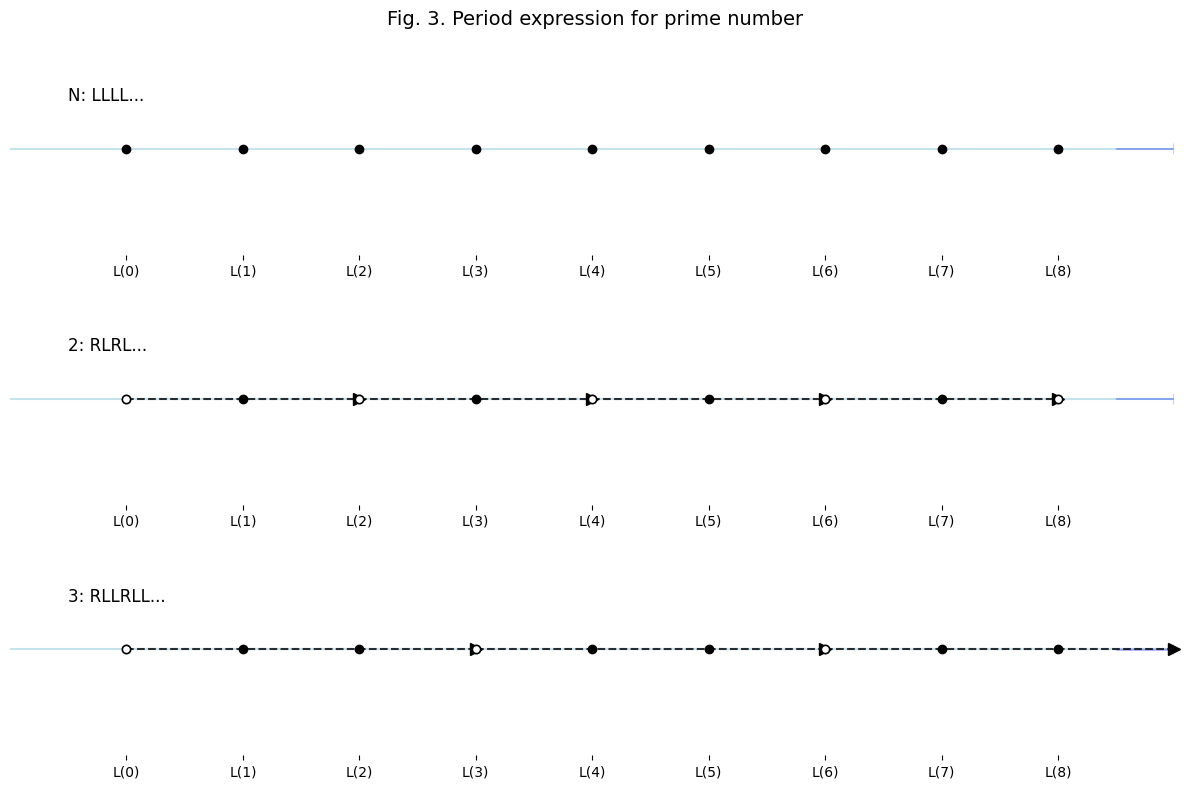

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体支持（可选）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 创建图形和子图
fig, axs = plt.subplots(3, 1, figsize=(12, 8), dpi=100)
fig.suptitle("Fig. 3. Period expression for prime number", fontsize=14, y=0.98)

# 公共参数
positions = list(range(9))  # 0 到 8
y_offset = [0.8, 0.4, 0.0]  # 三个图的垂直偏移
labels = ["N: LLLL...", "2: RLRL...", "3: RLLRLL..."]

# 绘制每个图
for i, ax in enumerate(axs):
    ax.set_xlim(-1, 9)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticks(positions)
    ax.set_xticklabels([f"L({p})" if p == 0 else f"L({p})" for p in positions])
    ax.set_yticks([])
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # 添加标签
    ax.text(-0.5, 1.0, labels[i], fontsize=12, ha='left', va='center')

    # 绘制水平线
    ax.axhline(y=0.5, color='lightblue', linewidth=1.5, alpha=0.7)

    # 绘制点
    if i == 0:  # N: 所有都是 L（黑色实心点）
        for p in positions:
            ax.plot(p, 0.5, 'o', markersize=6, color='black', zorder=5)
    elif i == 1:  # 2: 能被2整除的位置变为 R（白色空心圈）
        for p in positions:
            if p % 2 == 0:
                ax.plot(p, 0.5, 'o', markersize=6, color='white', markeredgecolor='black', markeredgewidth=1.2, zorder=5)
            else:
                ax.plot(p, 0.5, 'o', markersize=6, color='black', zorder=5)
    elif i == 2:  # 3: 能被3整除的位置变为 R
        for p in positions:
            if p % 3 == 0:
                ax.plot(p, 0.5, 'o', markersize=6, color='white', markeredgecolor='black', markeredgewidth=1.2, zorder=5)
            else:
                ax.plot(p, 0.5, 'o', markersize=6, color='black', zorder=5)

    # 添加虚线弧线（从原位置指向新位置）
    if i == 1:  # 2 的情况
        arcs = [(0, 2), (2, 4), (4, 6), (6, 8)]
        for start, end in arcs:
            x = np.array([start, end])
            y = np.array([0.5, 0.5]) + 0.3 * np.sin(np.pi * (x - start) / (end - start))
            ax.plot(x, y, '--', color='black', linewidth=1.5, alpha=0.8)
            ax.plot(end, 0.5, '>', markersize=8, color='black', transform=ax.transData, clip_on=False)
    elif i == 2:  # 3 的情况
        arcs = [(0, 3), (3, 6), (6, 9)]
        for start, end in arcs:
            x = np.array([start, end])
            y = np.array([0.5, 0.5]) + 0.3 * np.sin(np.pi * (x - start) / (end - start))
            ax.plot(x, y, '--', color='black', linewidth=1.5, alpha=0.8)
            ax.plot(end, 0.5, '>', markersize=8, color='black', transform=ax.transData, clip_on=False)

    # 添加箭头
    ax.arrow(8.5, 0.5, 0.5, 0, head_width=0.1, head_length=0.2, fc='blue', ec='blue', alpha=0.8)

# 调整布局
plt.tight_layout()
plt.show()